In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
def distance(x0, x1, grid=np.asarray([16, 16]), type='euclidian'):
    x0 = np.asarray(x0)
    x1 = np.asarray(x1)
    delta = np.abs(x0 - x1)
    delta = np.where(delta > grid * .5, delta - grid, delta)

    if type == 'manhattan':
        return np.abs(delta).sum(axis=-1)
    return np.sqrt((delta ** 2).sum(axis=-1))

In [7]:
v_rest = -70  # mV
e_ext = 0  # V
v_thr = -54  # mV
g_max = 0.2
tau_m = 20  # ms
tau_ex = 5  # ms

n = 16
N_layer = n ** 2
S = (n, n)
# S = (256, 1)
grid = np.asarray(S)

s_max = 16
sigma_form_forward = 2.5
sigma_form_lateral = 1
p_form_lateral = 1
p_form_forward = 0.16
p_elim_dep = 0.0245
p_elim_pot = 1.36 * np.e ** -4
f_rew = 10 ** 4  # Hz

# Inputs
f_mean = 20  # Hz
f_base = 5  # Hz
f_peak = 152.8  # Hz
sigma_stim = 2  # 2
t_stim = 20 # 20  # ms

# STDP
a_plus = 0.1
b = 1.2
tau_plus = 20.  # ms
tau_minus = 64.  # ms
a_minus = (a_plus * tau_plus * b) / tau_minus


In [10]:
manhattan_distances = np.ones(grid**2) * np.nan
euclidian_distances = np.ones(grid**2) * np.nan

In [11]:
for row in range(N_layer):
    for column in range(N_layer):
        manhattan_distances[row, column] = distance((row//n, row%n), (column//n, column%n), grid=grid, type='manhattan')
        euclidian_distances[row, column] = distance((row//n, row%n), (column//n, column%n), grid=grid, type='euclidian')

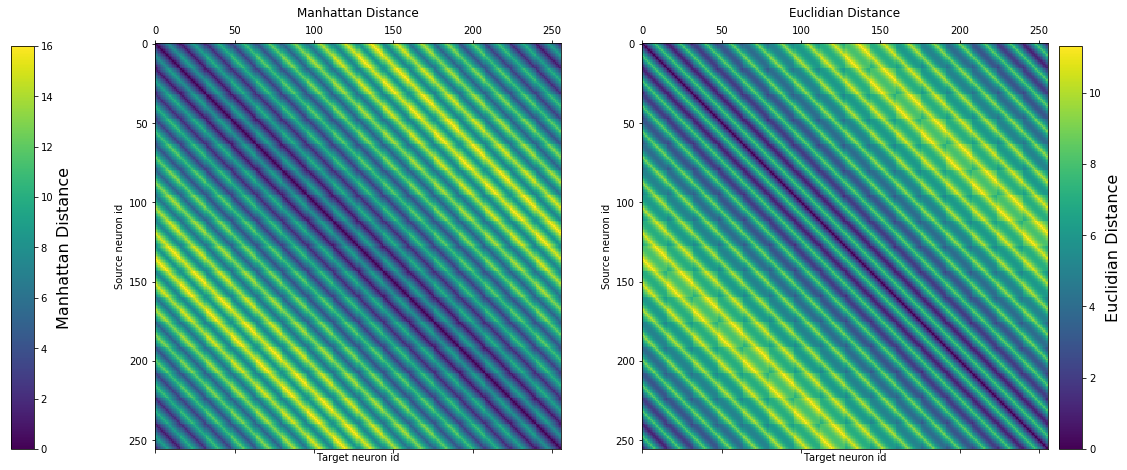

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8))
    
i1 =source_ax = ax1.matshow(manhattan_distances, vmin=0)
i =target_ax = ax2.matshow(euclidian_distances, vmin=0)

ax1.set_title("Manhattan Distance")
ax1.set_ylabel("Source neuron id")
ax1.set_xlabel("Target neuron id")
ax2.set_title("Euclidian Distance")
ax2.set_ylabel("Source neuron id")
ax2.set_xlabel("Target neuron id")
cbar_ax = fig.add_axes([.91, 0.15, 0.02, 0.7])
cbar = fig.colorbar(i, cax=cbar_ax)
cbar.set_label("Euclidian Distance", fontsize=16)

cbar_ax2 = fig.add_axes([0.0, 0.15, 0.02, 0.7])
cbar2 = fig.colorbar(i1, cax=cbar_ax2)
cbar2.set_label("Manhattan Distance", fontsize=16)

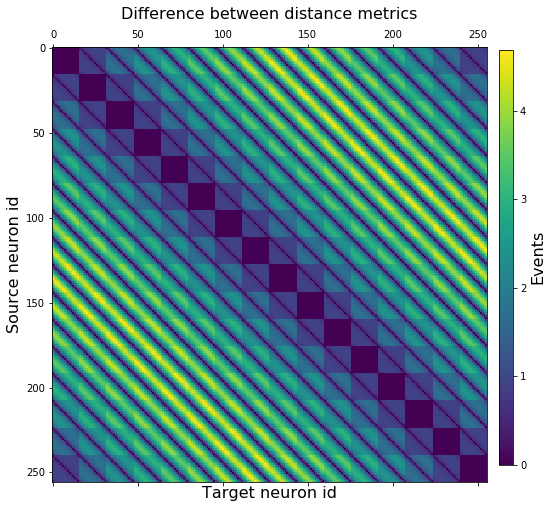

In [24]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8))
i = ax1.matshow(manhattan_distances - euclidian_distances)
ax1.grid(visible=False)
ax1.set_title("Difference between distance metrics", fontsize=16)
ax1.set_ylabel("Source neuron id", fontsize=16)
ax1.set_xlabel("Target neuron id", fontsize=16)
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Events", fontsize=16)

In [39]:
results_manhattan = p_form_forward * (np.e**(-(manhattan_distances**2)/(2*(sigma_form_forward**2))))
results_euclidian = p_form_forward * (np.e**(-(euclidian_distances**2)/(2*(sigma_form_forward**2))))

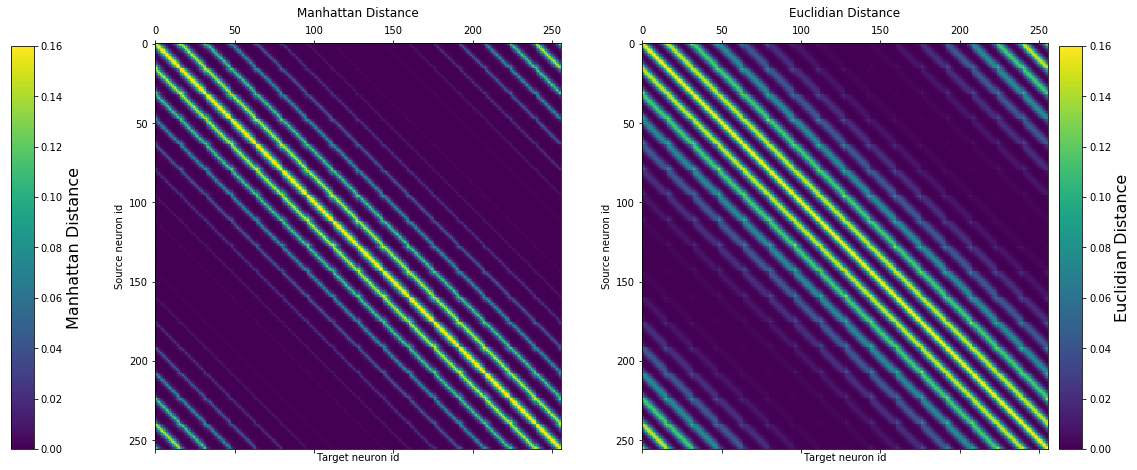

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8))
    
i1 =source_ax = ax1.matshow(results_manhattan, vmin=0)
i =target_ax = ax2.matshow(results_euclidian, vmin=0)

ax1.set_title("Manhattan Distance")
ax1.set_ylabel("Source neuron id")
ax1.set_xlabel("Target neuron id")
ax2.set_title("Euclidian Distance")
ax2.set_ylabel("Source neuron id")
ax2.set_xlabel("Target neuron id")
cbar_ax = fig.add_axes([.91, 0.15, 0.02, 0.7])
cbar = fig.colorbar(i, cax=cbar_ax)
cbar.set_label("Euclidian Distance", fontsize=16)

cbar_ax2 = fig.add_axes([0.0, 0.15, 0.02, 0.7])
cbar2 = fig.colorbar(i1, cax=cbar_ax2)
cbar2.set_label("Manhattan Distance", fontsize=16)

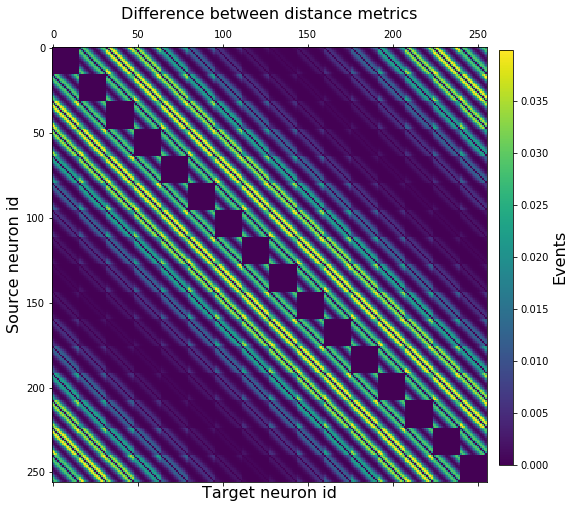

In [41]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8))
i = ax1.matshow(results_euclidian - results_manhattan)
ax1.grid(visible=False)
ax1.set_title("Difference between distance metrics", fontsize=16)
ax1.set_ylabel("Source neuron id", fontsize=16)
ax1.set_xlabel("Target neuron id", fontsize=16)
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Events", fontsize=16)

In [59]:
c = results_manhattan[0, :]
section_manhattan = np.sort(c)[::-1]
section_d_manhattan = np.sort(manhattan_distances[0,:])
section_euclidian = np.sort(results_euclidian[0,:])[::-1]
section_d_euclidian= np.sort(euclidian_distances[0,:])

(0.0, 16.0)

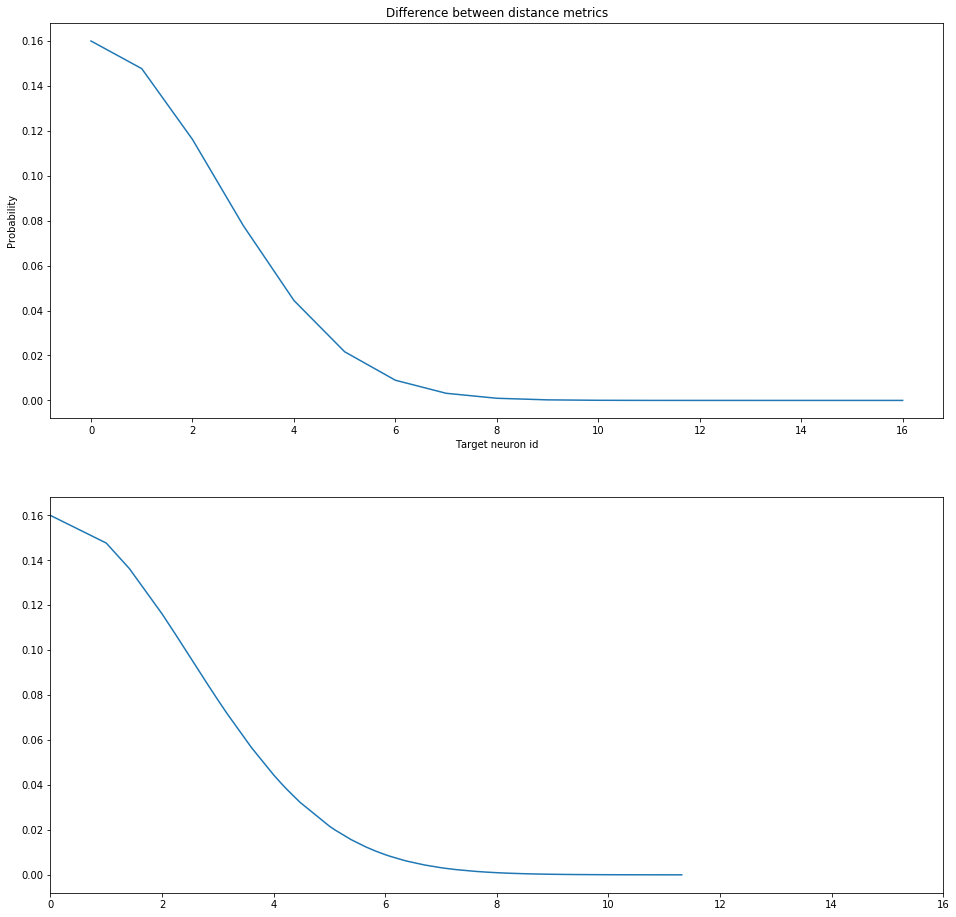

In [61]:
f, (ax1, ax2) = plt.subplots(2, 1 ,figsize=(16, 16))
i = ax1.plot(section_d_manhattan, section_manhattan)
ax2.plot(section_d_euclidian, section_euclidian)
ax1.grid(visible=False)
ax1.set_title("Difference between distance metrics")
ax1.set_ylabel("Probability")
ax1.set_xlabel("Target neuron id")

ax2.set_xlim([np.min(section_d_manhattan), np.max(section_d_manhattan)])

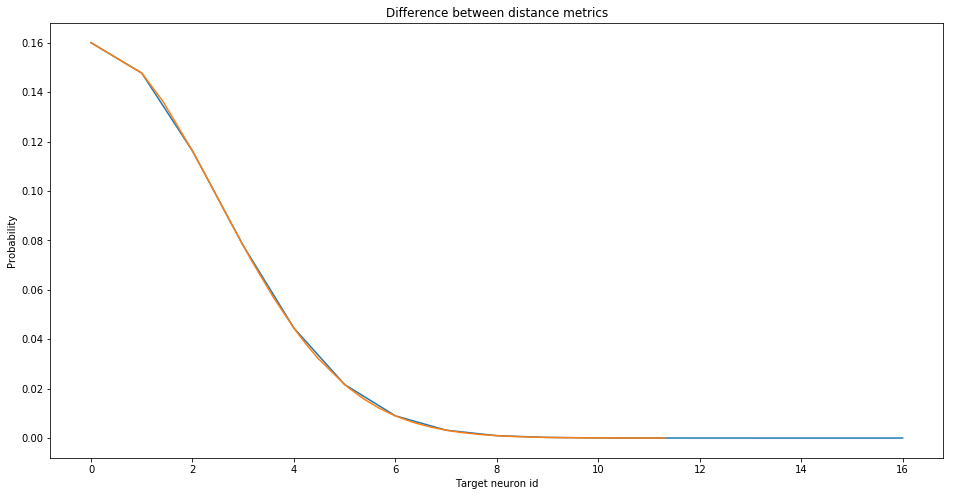

In [62]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
i = ax1.plot(section_d_manhattan, section_manhattan)
ax1.plot(section_d_euclidian, section_euclidian)
ax1.grid(visible=False)
ax1.set_title("Difference between distance metrics")
ax1.set_ylabel("Probability")
ax1.set_xlabel("Target neuron id")